# Text Classification Using Random Forest

In this notebook, we will perform text classification using the **Random Forest** classifier. The data is loaded from a CSV file named **complaints_processed.csv**.


In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
import re
import string
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import os


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anany\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [4]:
# Load the data
df = pd.read_csv('complaints_processed.csv', index_col=0)
df.head()

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...


In [8]:
# Display dataset information
print(f'--> There are {df.shape[0]} rows and {df.shape[1]} columns')
print('\n===========================================================\n')
print('--> Missing Values:\n\n', df.isna().sum())
print('\n===========================================================\n')
print('Product Counts:\n\n', df['product'].value_counts())


--> There are 162421 rows and 2 columns


--> Missing Values:

 product       0
narrative    10
dtype: int64


Product Counts:

 product
credit_reporting       91179
debt_collection        23150
mortgages_and_loans    18990
credit_card            15566
retail_banking         13536
Name: count, dtype: int64


In [9]:
# Drop missing values as they are minimal
df.dropna(axis=0, inplace=True)

# Display class distribution in original dataset
print('For Actual dataset:\n\n', df['product'].value_counts() * 100 / len(df))


For Actual dataset:

 product
credit_reporting       56.136592
debt_collection        14.252729
mortgages_and_loans    11.692558
credit_card             9.584326
retail_banking          8.333795
Name: count, dtype: float64


In [10]:
# Sampling the data for faster processing
data = df[['product', 'narrative']].sample(n=10000)

# Display class distribution in sample dataset
print('Sample dataset:\n\n', data['product'].value_counts() * 100 / len(data))


Sample dataset:

 product
credit_reporting       56.24
debt_collection        15.16
mortgages_and_loans    11.15
credit_card             9.37
retail_banking          8.08
Name: count, dtype: float64


In [13]:
# Define a function to clean text data
stopwords = nltk.corpus.stopwords.words('english')

def text_clean(text):
    """
    This function performs the following tasks:
    1. Converts text to lowercase
    2. Removes digits
    3. Removes words with fewer than 3 characters
    4. Removes stopwords
    """
    clean_words = []
    word_list = text.split()
    for word in word_list:
        word_l = word.lower().strip()
        if word_l.isalpha() and len(word_l) > 3 and word_l not in stopwords:
            clean_words.append(word_l)
    return clean_words


In [14]:
# Creating the Term Document Matrix
tfidf = TfidfVectorizer(analyzer=text_clean)
x_tfidf = tfidf.fit_transform(data['narrative'])

# Display shape of matrix
print("Shape of Term Document Matrix:", x_tfidf.shape)


Shape of Term Document Matrix: (10000, 13197)


In [18]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, prediction, normalize='true')

# Define the class names as per your data
class_names = ['credit_card', 'credit_reporting', 'debt_collection', 'mortgages_and_loans', 'retail_banking']


In [19]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(x_tfidf, data['product'], test_size=0.2, random_state=42)

# Train RandomForest Classifier
rfc = RandomForestClassifier(n_jobs=-1)
rfc_model = rfc.fit(X_train, y_train)

# Predict on test set
prediction = rfc_model.predict(X_test)

# Display Confusion Matrix and Classification Report
print("Confusion Matrix:\n\n", confusion_matrix(y_test, prediction))
print("\n")
print("Classification Report:\n\n", classification_report(y_test, prediction))


Confusion Matrix:

 [[  98   54    1    8   15]
 [   8 1097    9    4    0]
 [   4  176  139    9    2]
 [   5   54    4  156    4]
 [  13   23    5    2  110]]


Classification Report:

                      precision    recall  f1-score   support

        credit_card       0.77      0.56      0.64       176
   credit_reporting       0.78      0.98      0.87      1118
    debt_collection       0.88      0.42      0.57       330
mortgages_and_loans       0.87      0.70      0.78       223
     retail_banking       0.84      0.72      0.77       153

           accuracy                           0.80      2000
          macro avg       0.83      0.68      0.73      2000
       weighted avg       0.81      0.80      0.78      2000



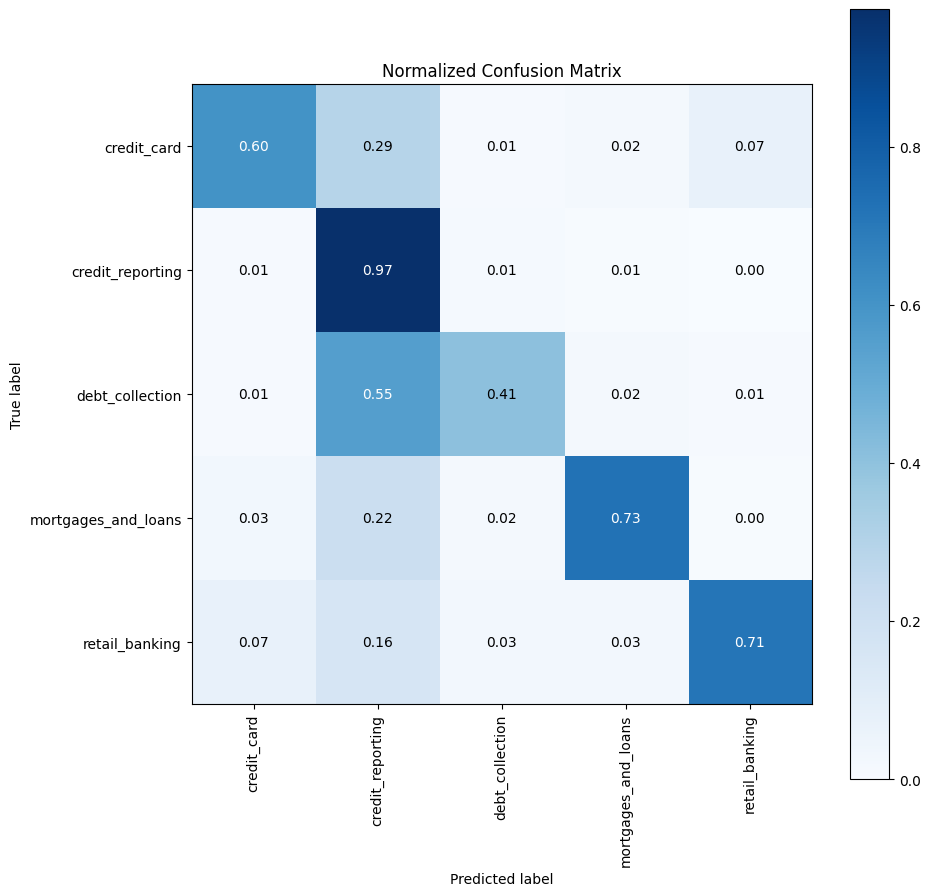

In [20]:
# Plotting the normalized confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Normalized Confusion Matrix")
plt.colorbar()

# Set tick marks and labels
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)

# Add text annotations to each cell
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, format(cm[i, j], ".2f"), ha="center", va="center", color="white" if cm[i, j] > 0.5 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
